# **Expiry date validation project**

**Problem Statement:**

Retail stores frequently encounter losses due to expired products that remain unsold. Traditional manual inventory checks are inefficient and often fail to ensure timely identification of items nearing their expiry dates. This leads to missed opportunities for early clearance sales and increased wastage.

This project aims to develop an AI-powered **Expiry Date Validation System** designed to proactively identify products nearing their expiry dates and issue alerts one month in advance. These alerts enable stores to implement clearance sales with promotional offers, ensuring products are sold before expiration. By automating the expiry tracking process and integrating predictive alerts, this system enhances inventory management, reduces wastage, and boosts sales efficiency.


# **Initial Research and Approach:**

To address the challenge of monitoring product expiry dates, the project began with the assumption that expiry date information might be embedded within product barcodes. Leveraging barcode decoding techniques such as Pyzbar and OpenCV, we explored the possibility of extracting expiry details directly from barcode scans. This initial phase of research was crucial in understanding the limitations of barcode data and informed the development of a more robust solution.

**Technologies Used for Barcode Decoding:**

**Pyzbar**



*   A Python library for decoding barcodes and QR codes from images.

*   Supports various formats like EAN, UPC, and Code128.

*  Extracted barcode data from images captured during cycle counts.







**OpenCV**



*   An open-source computer vision library.


*   Used for preprocessing images to enhance barcode readability (e.g., resizing, thresholding, and edge detection).

*   Integrated with Pyzbar for more accurate barcode detection and decoding.







**Complementary Tools**





*   Pillow: For image manipulation and format conversion before processing with Pyzbar.
*   NumPy: For handling image arrays during preprocessing.






**What is barcode**

A barcode is a machine-readable representation of data that is encoded in a series of black and white lines or squares, which can be scanned using a barcode reader. It is commonly used for product identification, tracking, and managing inventory. Barcodes encode information in a format that can be read by optical scanners, also known as barcode scanners.

The pattern of bars and spaces encodes specific information, such as a product ID, price, or inventory code. The information is read by a scanner, which converts the barcode pattern back into data.



Common Barcode Types:
UPC (Universal Product Code): Commonly used in retail, typically found on products in stores. It is a 12-digit numeric code.
EAN (European Article Number): Similar to UPC, but used internationally and typically has 13 digits.
Code 39: Used in logistics and inventory management, can encode both letters and numbers.
QR Code (Quick Response Code): A 2D barcode that can store more information (including URLs, text, and other data). It's widely used in mobile applications, advertisements, and ticketing.

 **implementing pyzbar**

In [ ]:
import cv2 # read image /ccamera/vedio input

In [ ]:
!pip install pyzbar pillow

libzbar is a library used for scanning and decoding barcodes and QR codes. It provides the core functionality for barcode recognition that many libraries, including Pyzbar, rely on.

In [ ]:
!apt-get install libzbar0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x libfftw3-bin
  libfftw3-dev inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-doub

In [ ]:
from pyzbar.pyzbar import decode

In [ ]:
from pyzbar.pyzbar import decode
import cv2

Saving img1.jpg to img1.jpg


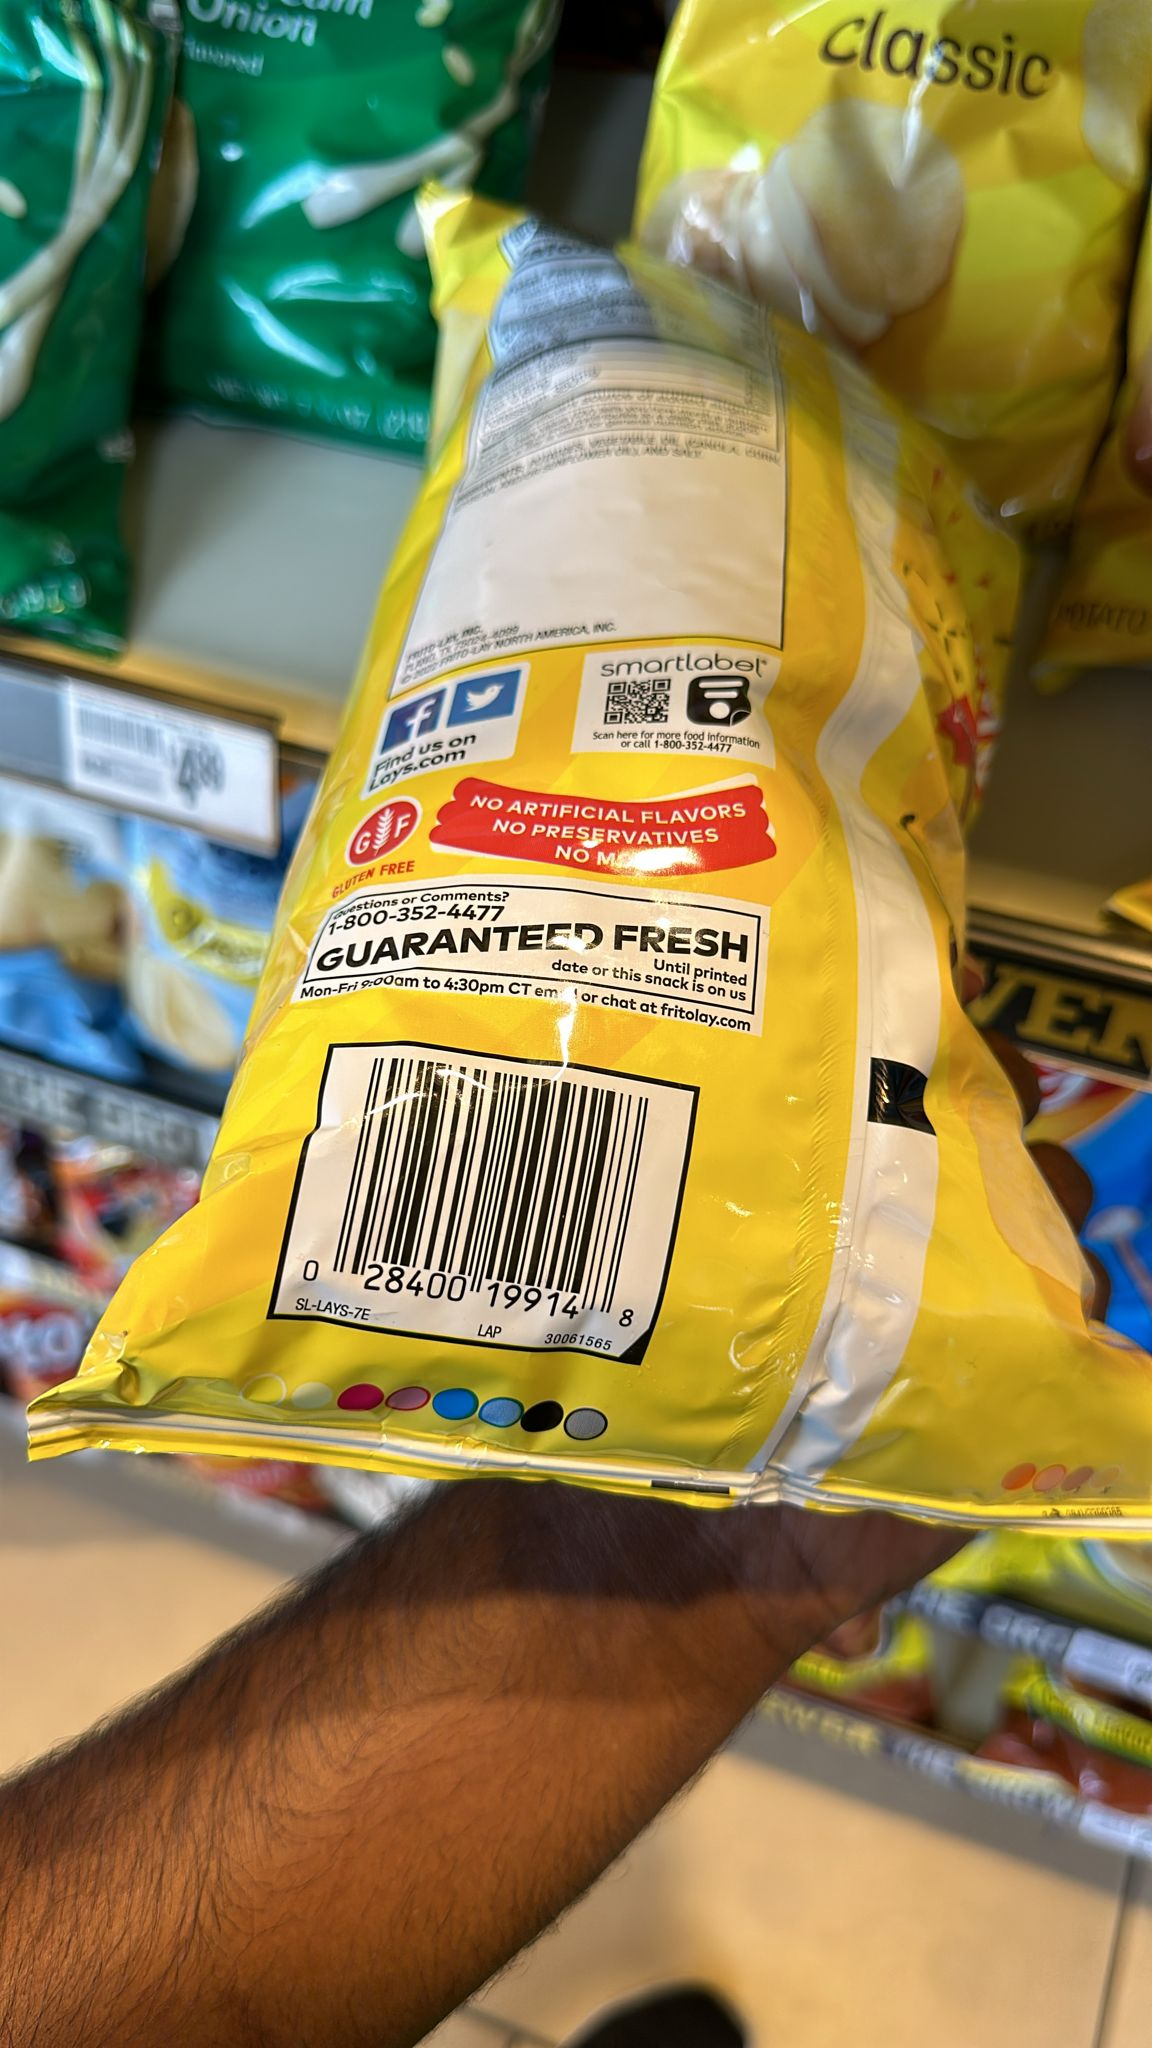

In [ ]:
from google.colab import files
from PIL import Image
from IPython.display import display

# Upload the image file
uploaded = files.upload()

# Get the filename of the uploaded image
filename = list(uploaded.keys())[0]

# Open and display the uploaded image in the notebook
img = Image.open(filename)
display(img)  # Display in the notebook

# Show the image in a separate window (optional, may not work in Colab)
img.show()

In [ ]:
from pyzbar.pyzbar import decode

# Decode the barcode from the image
decoded_objects = decode(img)

# Display the decoded information
for obj in decoded_objects:
    print("Type:", obj.type)
    print("Data:", obj.data.decode('utf-8'))


Type: EAN13
Data: 0028400199148


In [ ]:
import requests

# Your decoded EAN code
ean_code = "0028400199148"  # Replace with your decoded EAN

# Sample API URL with your API key
api_url = f'https://api.upcitemdb.com/prod/trial/lookup?upc={ean_code}'  # Replace with your actual API key

response = requests.get(api_url)

if response.status_code == 200:
    product_info = response.json()
    if product_info['items']:
        product = product_info['items'][0]  # Get the first item
        print(f"Product Name: {product.get('title', 'N/A')}")
        print(f"Brand: {product.get('brand', 'N/A')}")
        print(f"Description: {product.get('description', 'N/A')}")
        print(f"Image URL: {product.get('images', ['N/A'])[0]}")
    else:
        print("No product information found.")
else:
    print("Failed to retrieve product information.")


Product Name: Lay s Classic Potato Chips  8 oz Bag
Brand: Lay s
Description: It all starts with farm-grown potatoes  cooked and seasoned to perfection. So every LAY S potato chip is perfectly crispy and full of fresh potato taste. Happiness in Every Bite. Perfect for your next family gathering!
Image URL: https://pics.walgreens.com/prodimg/623983/450.jpg


The above code allows you to upload an image, decode the barcode using Pyzbar, and extract the product's EAN code. It then queries an API (UPCItemDB) to retrieve product details like name, brand, description, and an image URL based on the decoded barcode.

Output Example:
For the decoded EAN code 0028400199148, the output is:



*   Product Name: Lay’s Classic Potato Chips

*  Brand: Lay’s

*   Description: A description of the product.

*  Image URL: Link to the product's image.




**Implementing openCV**

OpenCV (Open Source Computer Vision Library) is a powerful, open-source library that is widely used for image processing and computer vision tasks. It provides tools for real-time computer vision applications, such as detecting objects, processing images, and performing feature extraction. In the given code, OpenCV is used to process and display an image, as well as to handle the barcode decoding.

Barcode/QR Code Decoding: OpenCV helps by preparing the image for decoding. The pyzbar library, which works in conjunction with OpenCV, is used to detect and decode the barcode or QR code from the image. The decode() function returns a list of decoded objects, which contain information like the type of barcode and the encoded data.

Saving img2.jpg to img2.jpg
Type: EAN13
Data: 0028400199148


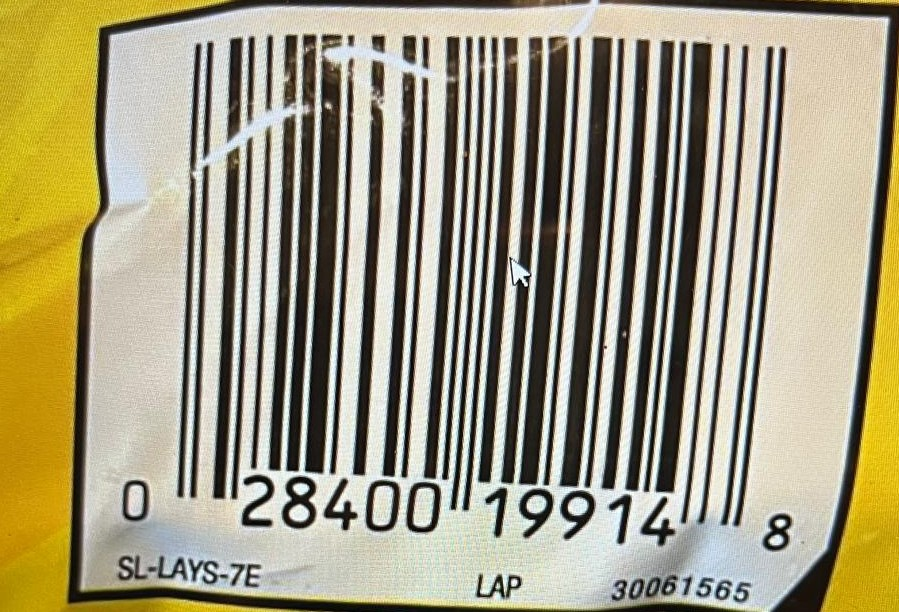

In [ ]:
import cv2
from pyzbar.pyzbar import decode
from google.colab import files
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

# Upload the image file
uploaded = files.upload()

# Get the filename of the uploaded image
filename = list(uploaded.keys())[0]

# Open the image using PIL (Pillow)
img_pil = Image.open(filename)

# Convert the PIL image to a NumPy array for OpenCV
img = np.array(img_pil)

# Convert RGB to BGR (OpenCV uses BGR format)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Decode the barcode or QR code in the image
decoded_objects = decode(img)

# Display the decoded information
for obj in decoded_objects:
    print("Type:", obj.type)
    print("Data:", obj.data.decode('utf-8'))

    # Optional: Draw a rectangle around the decoded barcode
    rect_points = obj.polygon
    if len(rect_points) == 4:
        pts = np.array(rect_points, dtype=np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(img, [pts], True, (0, 255, 0), 3)

# Display the image with the decoded barcode highlighted
cv2_imshow(img)  # Use cv2_imshow instead of cv2.imshow




Since the expiry date information was not present in the barcode, I shifted to decoding QR codes. This makes sense, as QR codes have more data capacity and may contain additional information such as expiry dates.

**What is QR code?**

A QR code (Quick Response code) is a type of two-dimensional (2D) barcode that can store a large amount of data in both horizontal and vertical directions, making it capable of holding more information than traditional one-dimensional (1D) barcodes. QR codes are widely used for a variety of applications, from linking to websites to storing contact information or product details.

**How QR Codes Work:**

Encoding Data: Data is encoded into a QR code using a specific algorithm that converts text or numerical data into a pattern of black and white squares.


Scanning and Decoding: When a scanner reads a QR code, it processes the arrangement of squares and decodes the information. QR codes can be read from any angle because they include alignment markers and orientation features.

Saving img3.jpg to img3.jpg


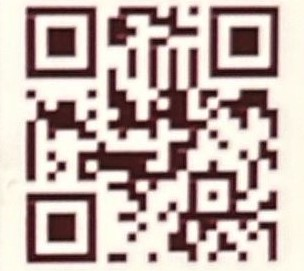

In [ ]:
# Upload the image file
uploaded = files.upload()

# Get the filename of the uploaded image
filename = list(uploaded.keys())[0]

# Open and display the uploaded image
img1 = Image.open(filename)
display(img1)

In [ ]:
decoded_objects = decode(img1)

# Display the decoded information
for obj in decoded_objects:
    print("Type:", obj.type)
    print("Data:", obj.data.decode('utf-8'))

Type: QRCODE
Data: http://hrshys.net/ugtg5mw


I explored and decoded the QR code, but I was unable to find the expiry date information within it.

In [ ]:
# Import necessary modules
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize iframe to fit video
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for the user to click the capture button
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        // Stop the video stream
        stream.getTracks().forEach(track => track.stop());
        div.remove();

        // Return the image data as a Base64 string
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')

    # Display the JavaScript widget for capturing the photo
    display(js)

    # Evaluate the JavaScript to capture photo and get the Base64 string
    data = eval_js('takePhoto({})'.format(quality))

    # Decode the Base64 string and save the photo
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)

    return filename

# Capture and display the photo
filename = take_photo()
print('Saved to {}'.format(filename))


<IPython.core.display.Javascript object>

Above, I experimented to detect the live images and decode the information using camera

In the first phase of my project, I assumed that the expiry date information would be stored in the barcode or QR code, as barcodes are commonly scanned for product information, billing, and inventory management in stores. However, through research and further study, I discovered that expiry date information is not typically included in barcodes. To proceed with my project, I deepened my research by exploring various YouTube channels, research papers, and directly visiting stores. From my findings, I learned that some research papers used different technologies, such as Tesseract OCR, along with datasets like MNIST for learning digits that are often labeled on products. As a result, I shifted to my second approach, where I started using Tesseract technology to detect the labeled information on product packaging.



---



# **Second Approach in My Research**

Here, I started working on detecting the labeled expiry date, so I used **Pytesseract OCR** technology to extract the expiry date information from the product labels.

**what is
Pytesseract OCR?**

Pytesseract OCR (Optical Character Recognition) is a Python wrapper for Tesseract, an open-source OCR engine. It allows you to extract text from images, making it possible to recognize and convert printed or handwritten text into machine-readable data.

**How It Works:**



*  Input: An image containing text (such as a scanned document, product label, or photo of text).
*  Process: Pytesseract processes the image using the Tesseract OCR engine, detecting the shapes, patterns, and structure of the characters.

* Output: The text that was identified in the image is returned as a string, which can be further analyzed or processed in a Python application.







In [15]:
!pip install pytesseract opencv-python Pillow

In [16]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,302 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 125257 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

Saving img4.jpg to img4.jpg


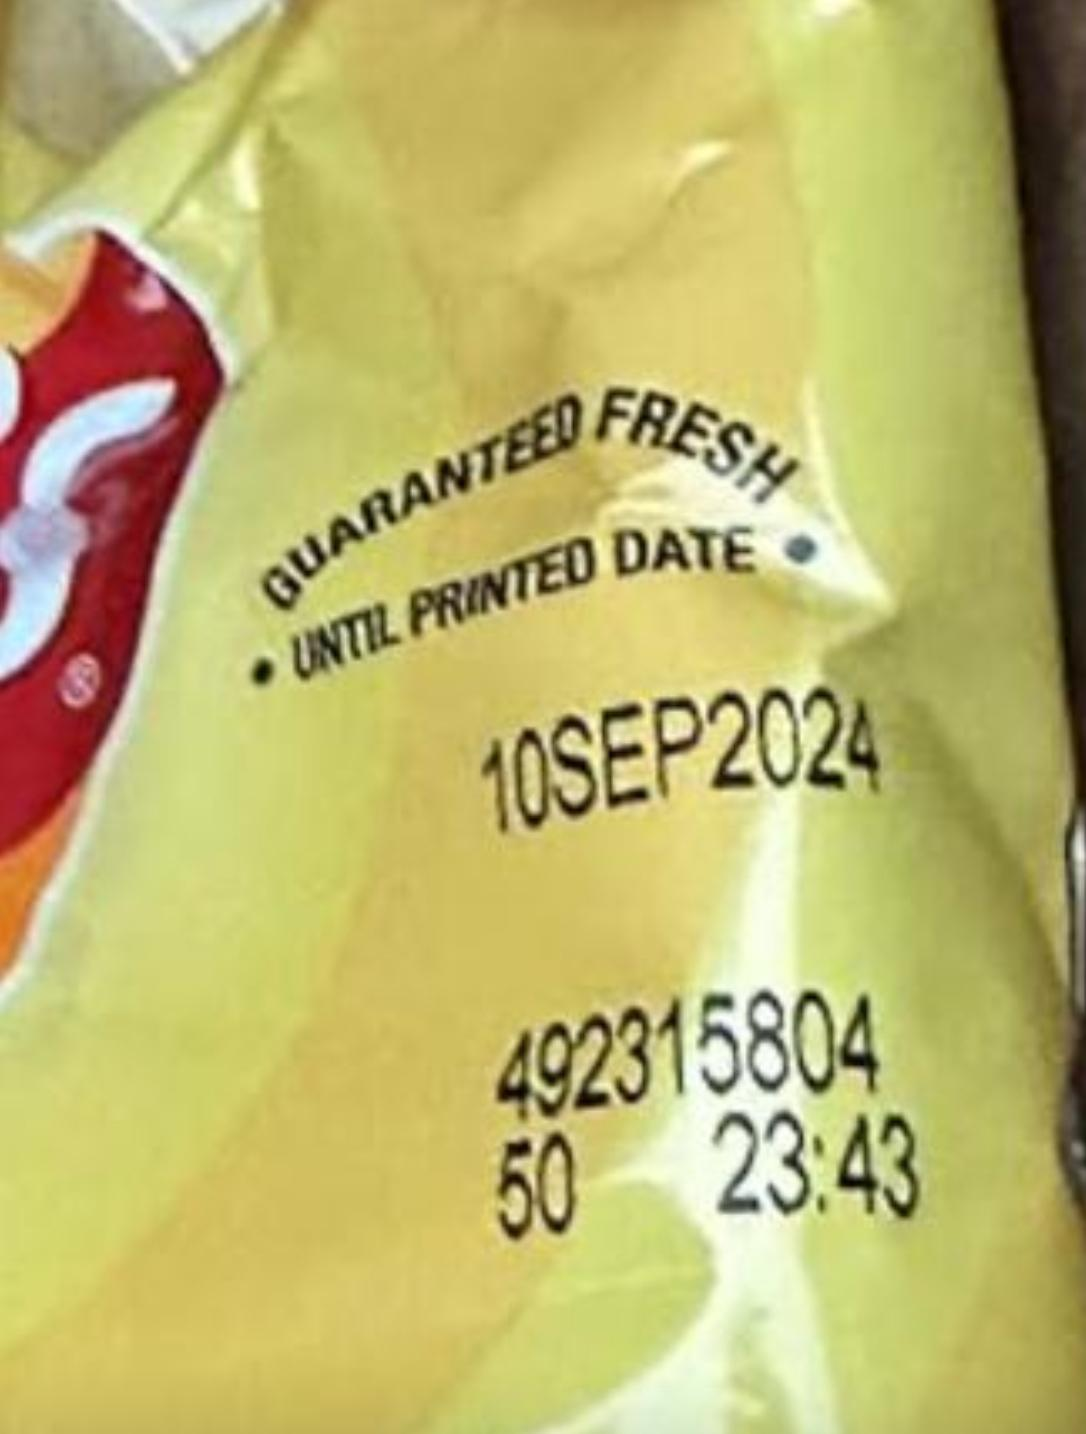

In [17]:
from google.colab import files
from PIL import Image
from IPython.display import display

# Upload the image file
uploaded = files.upload()

# Get the filename of the uploaded image
filename = list(uploaded.keys())[0]

# Open and display the uploaded image
img = Image.open(filename)
display(img)

In [18]:
import cv2
import pytesseract
from PIL import Image
import numpy as np

# Load the image
img = cv2.imread(filename)

# Optionally, convert the image to grayscale for better OCR accuracy
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply some preprocessing (e.g., thresholding) to improve OCR results
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Use pytesseract to extract text
text = pytesseract.image_to_string(thresh)

# Print the extracted text
print("Extracted Text:")
print(text)

Extracted Text:
{ 7 . rd
: F,
DATE @

vet
Peart ¥

 

315804
“eet

 



In [19]:
import re
from datetime import datetime

# Assuming 'text' contains the extracted text from the image
text = """ Extracted Text
Product: Milk
Expiry Date: 12/30/2024
Batch No: 123456
"""

# Define a regex pattern for various date formats
date_patterns = [
    r'\b\d{1,2}/\d{1,2}/\d{2,4}\b',  # MM/DD/YYYY or DD/MM/YYYY
    r'\b\d{1,2}-\d{1,2}-\d{2,4}\b',  # MM-DD-YYYY or DD-MM-YYYY
    r'\b\d{4}-\d{1,2}-\d{1,2}\b',     # YYYY-MM-DD
]

# Combine the patterns into a single regex
combined_pattern = '|'.join(date_patterns)

# Search for the date patterns in the extracted text
matches = re.findall(combined_pattern, text)

# Validate and format found dates
expiry_dates = []
for match in matches:
    try:
        # Try parsing the date in different formats
        if '/' in match:
            date_obj = datetime.strptime(match, '%m/%d/%Y')
        elif '-' in match:
            date_obj = datetime.strptime(match, '%Y-%m-%d')
        else:
            continue

        expiry_dates.append(date_obj.strftime('%Y-%m-%d'))  # Format date as YYYY-MM-DD
    except ValueError:
        continue  # Skip invalid dates

# Display the found expiry dates
print("Found Expiry Dates:")
for expiry in expiry_dates:
    print(expiry)


Found Expiry Dates:
2024-12-30


Saving img5 to img5


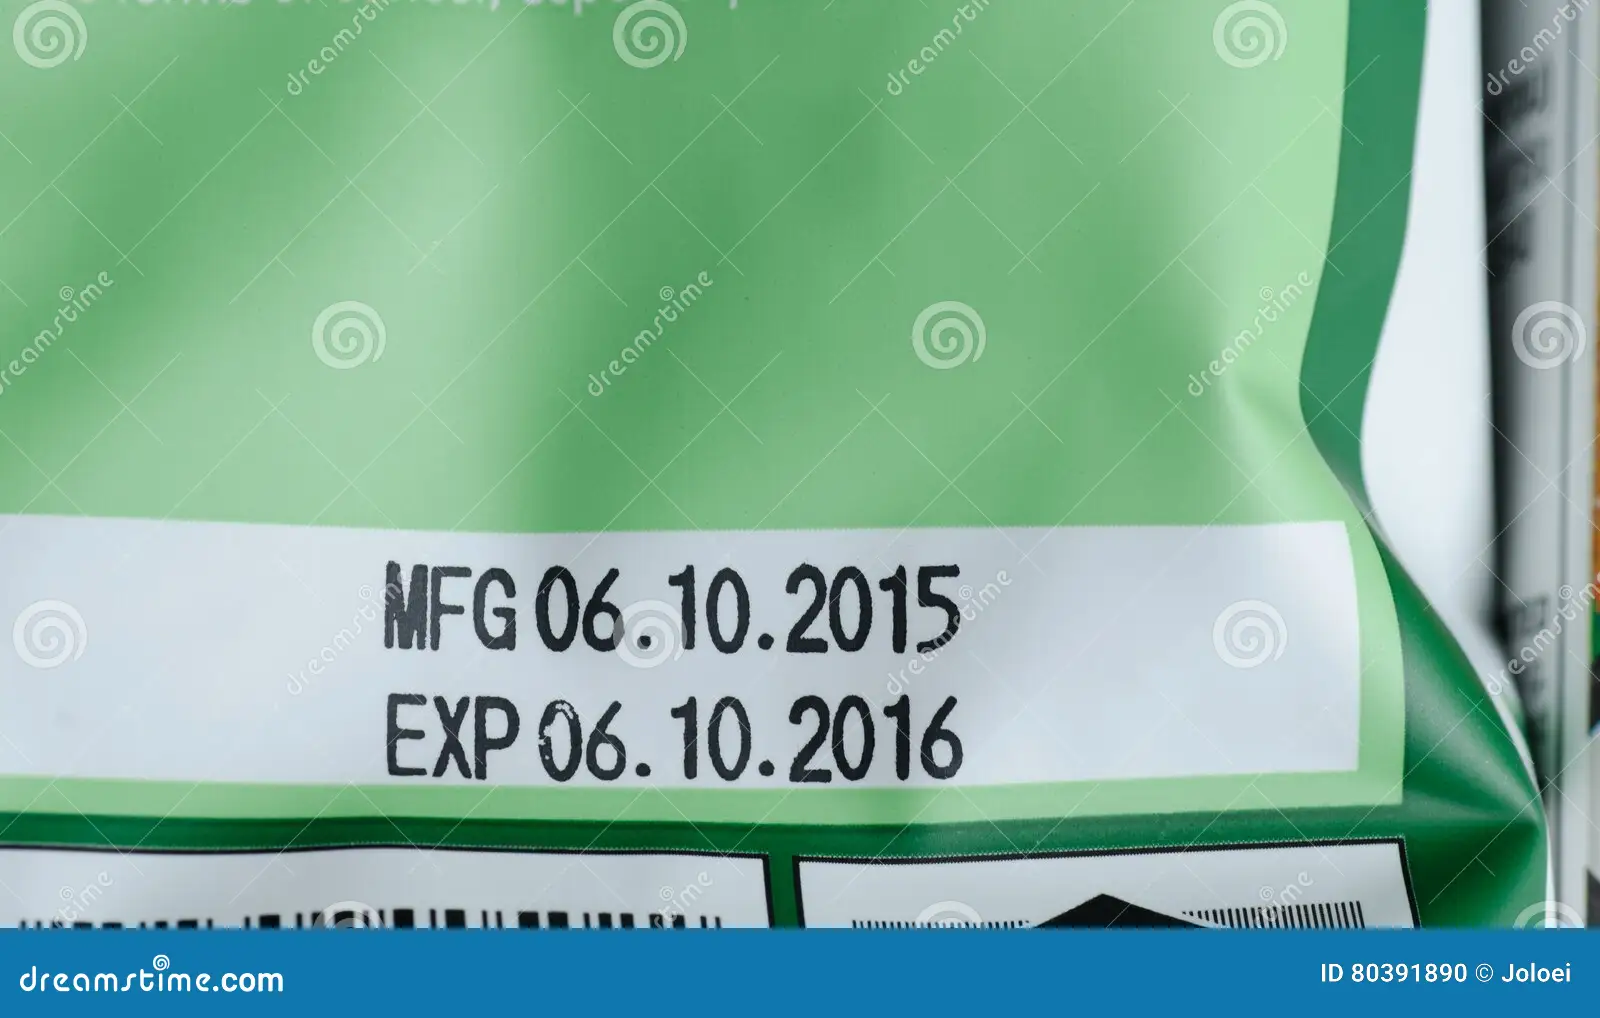

In [20]:
# Upload the image file
uploaded = files.upload()

# Get the filename of the uploaded image
filename = list(uploaded.keys())[0]

# Open and display the uploaded image
img = Image.open(filename)
display(img)

In [21]:
# Load the image
img = cv2.imread(filename)

# Optionally, convert the image to grayscale for better OCR accuracy
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply some preprocessing (e.g., thresholding) to improve OCR results
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Use pytesseract to extract text
text = pytesseract.image_to_string(thresh)

# Print the extracted text
print("Extracted Text:")
print(text)

Extracted Text:
   

 
     

    

MFG 06.10.2015
meee :
— |

eo
dreamscime.com ID 80391890 © Joloei

  



In [22]:
# Assuming 'text' contains the extracted text from the image
text = """ MFG 06.10.2015
meee :
— |

eo
dreamscime.com ID 80391890 © Joloei
"""

# Define a regex pattern for various date formats
date_patterns = [
    r'\b\d{1,2}/\d{1,2}/\d{2,4}\b',  # MM/DD/YYYY or DD/MM/YYYY
    r'\b\d{1,2}-\d{1,2}-\d{2,4}\b',  # MM-DD-YYYY or DD-MM-YYYY
    r'\b\d{4}-\d{1,2}-\d{1,2}\b',     # YYYY-MM-DD
]

# Combine the patterns into a single regex
combined_pattern = '|'.join(date_patterns)

# Search for the date patterns in the extracted text
matches = re.findall(combined_pattern, text)

# Validate and format found dates
expiry_dates = []
for match in matches:
    try:
        # Try parsing the date in different formats
        if '/' in match:
            date_obj = datetime.strptime(match, '%m/%d/%Y')
        elif '-' in match:
            date_obj = datetime.strptime(match, '%Y-%m-%d')
        else:
            continue

        expiry_dates.append(date_obj.strftime('%Y-%m-%d'))  # Format date as YYYY-MM-DD
    except ValueError:
        continue  # Skip invalid dates

# Display the found expiry dates
print("Found Expiry Dates:")
for expiry in expiry_dates:
    print(expiry)


Found Expiry Dates:


Saving img6.jpg to img6.jpg


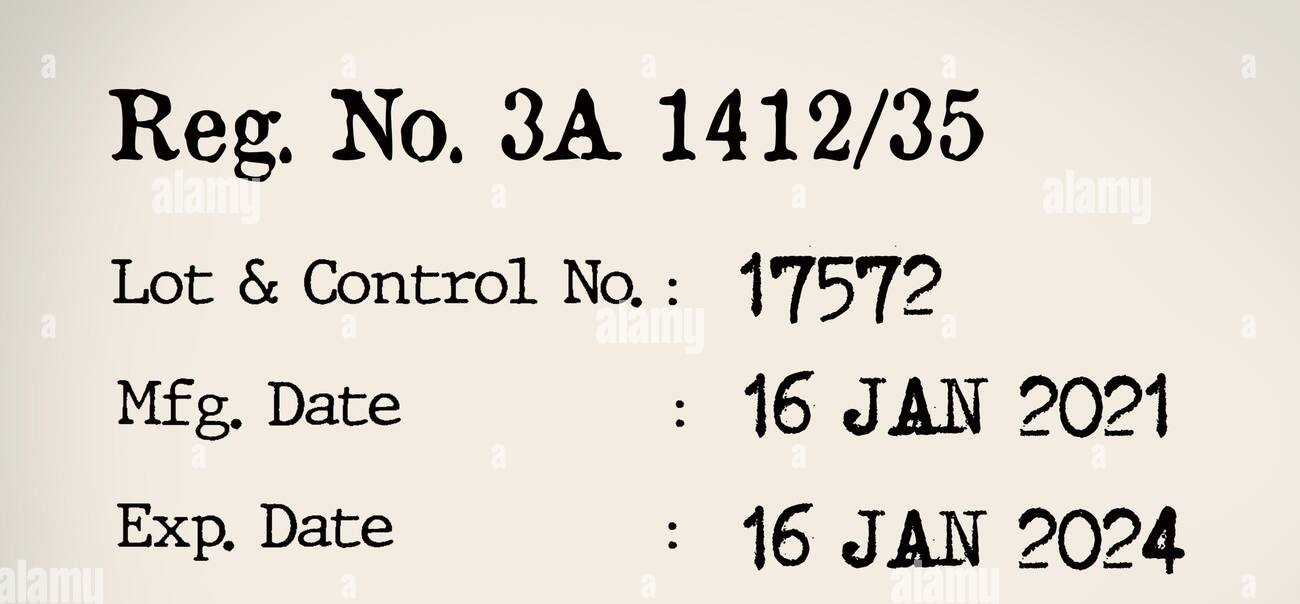

In [23]:
# Upload the image file
uploaded = files.upload()

# Get the filename of the uploaded image
filename = list(uploaded.keys())[0]

# Open and display the uploaded image
img = Image.open(filename)
display(img)

In [24]:
# Load the image
img = cv2.imread(filename)

# Optionally, convert the image to grayscale for better OCR accuracy
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply some preprocessing (e.g., thresholding) to improve OCR results
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Use pytesseract to extract text
text = pytesseract.image_to_string(thresh)

# Print the extracted text
print("Extracted Text:")
print(text)

Extracted Text:
Reg. No. 3A 1412/35

Lot & Control No.: 17572

Wogoam ela : 16 JAN 2021
oe ee > 46 JAN 2024



Using Tesseract OCR technology in my second approach, I successfully obtained the labeled expiry information. Therefore, I want to continue my project using Tesseract technology.

I started researching datasets to continue my project using Tesseract, but I was unable to find any suitable datasets. So, I began creating my own dataset. I visited a nearby store, collected images, and organized the dataset by splitting the images into training, validation, and test sets.

This file contains my initial research and various experiments conducted before creating the dataset.